## Data Summary Notebook

In this notebook we seek to extract data from the Platynereis Larva Dumerilii Connectome and categorize the data in a way that will allow us to easily plot meaningful statistics of the dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import logging
import collections
from itertools import chain, combinations
from pkg.platy import _get_folder, load_connectome_normal_lcc_annotations_v2
from pathlib import Path

/Users/kareefullah/Library/Caches/pypoetry/virtualenvs/platy-data-EVeqgmAk-py3.9/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


        skids side class segment   type  group
0     2015233    l     s    head  100.0    NaN
1     1548290    l   NaN       1    NaN    NaN
2     1318919    l     s    head   88.0   15.0
3     2015241    l     s    head  100.0    NaN
4     1646603    r   NaN       3    NaN    NaN
...       ...  ...   ...     ...    ...    ...
2696  1302513    l     s    head    NaN    NaN
2697  1630186    l   NaN       2    NaN    NaN
2698  1441779    r   NaN    head    NaN    NaN
2699  1671147    r     m       1  165.0    NaN
2700  1048573    l     i       3    NaN    NaN

[2701 rows x 6 columns]
        skids   side      class segment   type  group
0     2015233   left    sensory    head  100.0    NaN
1     1548290   left     muscle       1    NaN    NaN
2     1318919   left    sensory    head   88.0   15.0
3     2015241   left    sensory    head  100.0    NaN
4     1646603  right        NaN       3    NaN    NaN
...       ...    ...        ...     ...    ...    ...
2696  1302513   left    sensory  

We retrieve the table of annotations, where the indices are the skids and the columns are the types of annotations associated with these skids

In [6]:
folder = _get_folder()
new_folder = Path.joinpath(folder, "data_summary_v2")
annotations = load_connectome_normal_lcc_annotations_v2()
annotations = annotations.fillna("N/A")
new_folder

PosixPath('/Users/kareefullah/Desktop/NeuroData/neurodata/platy-data/docs/outputs/data_summary_v2')

With this table of annotations, we can make barplots to plot the number of neurons for certain categories

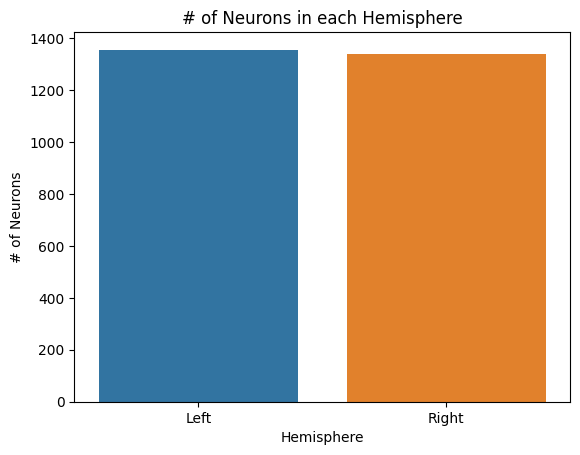

In [16]:
#print number of neurons in each hemisphere
hemis = {}
hemi_list = list(annotations["side"])
for i in range(len(hemi_list)):
    if hemi_list[i] == "N/A" or hemi_list[i] == "c":
        continue
    
    if hemi_list[i] not in hemis:
        hemis[hemi_list[i]] = 1
    
    else:
        hemis[hemi_list[i]] += 1


hemi_keys = ["Left", "Right"]
#change keys
for key in hemi_keys:
    hemis[key] = hemis.pop(key.lower())

sns.barplot(x=list(hemis.keys()), y=list(hemis.values())) 
plt.title("# of Neurons in each Hemisphere")
plt.xlabel("Hemisphere")
plt.ylabel("# of Neurons")
plt.savefig(new_folder / "neuron_count_hems")

{'Sensory': 555, 'Inter': 976, 'Motor': 230, 'Muscle': 484, 'Epithelia': 114, 'Ciliated': 76}


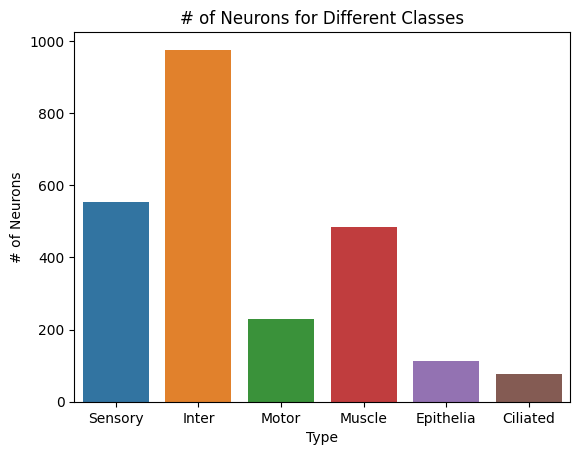

In [15]:
#print number of neurons for different types
classes = {}
class_list = list(annotations["class"])

for i in range(len(class_list)):
    if class_list[i] == "N/A":
        continue
    
    if class_list[i] not in classes:
        classes[class_list[i]] = 1
    
    else:
        classes[class_list[i]] += 1

class_keys = ["Sensory", "Inter", "Motor", "Muscle", "Epithelia", "Ciliated"]
#change keys
for key in class_keys:
    classes[key] = classes.pop(key.lower())

print(classes)

sns.barplot(x=list(classes.keys()), y=list(classes.values())) 
plt.title("# of Neurons for Different Classes")
plt.xlabel("Type")
plt.ylabel("# of Neurons")
plt.savefig(new_folder / "neuron_count_classes")

In [1]:
555+976+230+484+114+75

2434

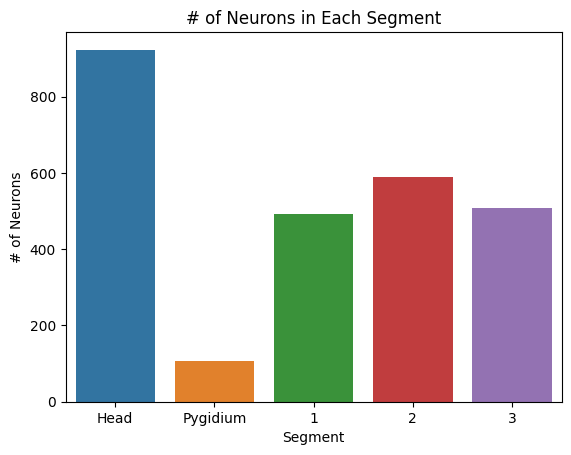

In [17]:
#print number of neurons in different segments
segments = {}
segment_list = list(annotations["segment"])

for i in range(len(segment_list)):
    if segment_list[i] == "N/A":
        continue
    
    if segment_list[i] not in segments:
        segments[segment_list[i]] = 1
    
    else:
        segments[segment_list[i]] += 1
segment_keys = ["Head", "Pygidium", "1", "2", "3"]

#change keys
for key in segment_keys:
    segments[key] = segments.pop(key.lower())

#no segment 0
segments.pop("0")

sns.barplot(x=list(segments.keys()), y=list(segments.values())) 
plt.title("# of Neurons in Each Segment")
plt.xlabel("Segment")
plt.ylabel("# of Neurons")
plt.savefig(new_folder / "neuron_count_segments")

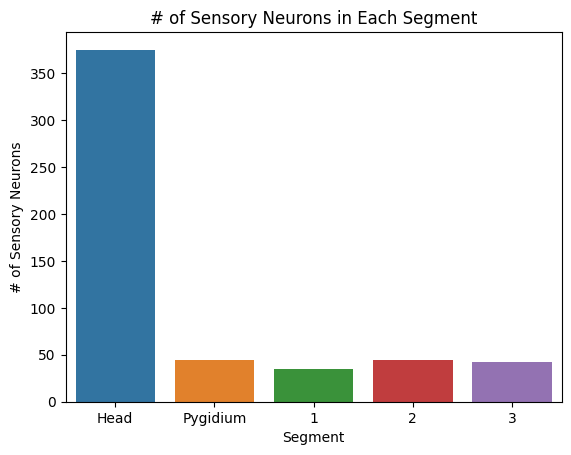

In [18]:
#print number of sensory neurons in each segment

indices = []
segment_sensory = {}
for i in range(len(class_list)):
    if(class_list[i] == "sensory"):
        indices.append(i)

for i in indices:
    if segment_list[i] == "N/A":
        continue
    
    if segment_list[i] not in segment_sensory:
        segment_sensory[segment_list[i]] = 1
    
    else:
        segment_sensory[segment_list[i]] += 1


segment_keys = ["Head", "Pygidium", "1", "2", "3"]

#change keys
for key in segment_keys:
    segment_sensory[key] = segment_sensory.pop(key.lower())

#no segment 0
segment_sensory.pop("0")

sns.barplot(x=list(segment_sensory.keys()), y=list(segment_sensory.values())) 
plt.title("# of Sensory Neurons in Each Segment")
plt.xlabel("Segment")
plt.ylabel("# of Sensory Neurons")
plt.savefig(new_folder / "neuron_count_sensory_in_segments")

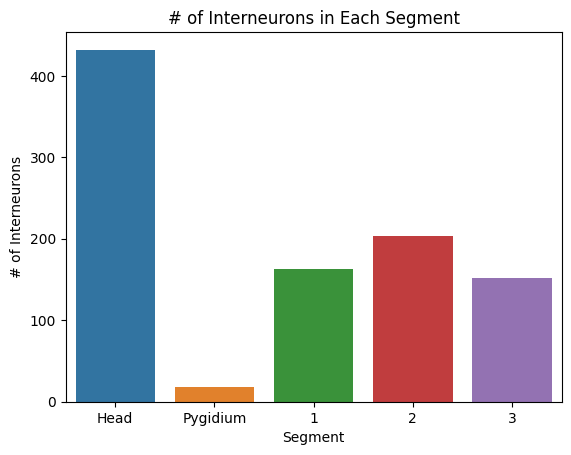

In [20]:
#print number of interneurons in each segment

indices = []
segment_inter = {}
for i in range(len(class_list)):
    if(class_list[i] == "inter"):
        indices.append(i)

for i in indices:
    if segment_list[i] == "N/A":
        continue
    
    if segment_list[i] not in segment_inter:
        segment_inter[segment_list[i]] = 1
    
    else:
        segment_inter[segment_list[i]] += 1
        
segment_keys = ["Head", "Pygidium", "1", "2", "3"]

#change keys
for key in segment_keys:
    segment_inter[key] = segment_inter.pop(key.lower())

#no segment 0
segment_inter.pop("0")

sns.barplot(x=list(segment_inter.keys()), y=list(segment_inter.values())) 
plt.title("# of Interneurons in Each Segment")
plt.xlabel("Segment")
plt.ylabel("# of Interneurons")
plt.savefig(new_folder / "neuron_count_inter_in_segments")

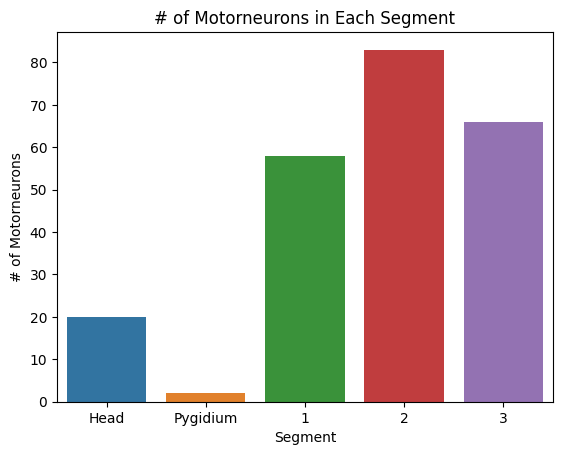

In [23]:
#print number of motorneurons in each segment

indices = []
segment_motor = {}
for i in range(len(class_list)):
    if(class_list[i] == "motor"):
        indices.append(i)

for i in indices:
    if segment_list[i] == "N/A":
        continue
    
    if segment_list[i] not in segment_motor:
        segment_motor[segment_list[i]] = 1
    
    else:
        segment_motor[segment_list[i]] += 1

segment_keys = ["Head", "Pygidium", "1", "2", "3"]

#change keys
for key in segment_keys:
    segment_motor[key] = segment_motor.pop(key.lower())

#no segment 0
segment_motor.pop("0")

sns.barplot(x=list(segment_motor.keys()), y=list(segment_motor.values())) 
plt.title("# of Motorneurons in Each Segment")
plt.xlabel("Segment")
plt.ylabel("# of Motorneurons")
plt.savefig(new_folder / "neuron_count_motor_in_segments")

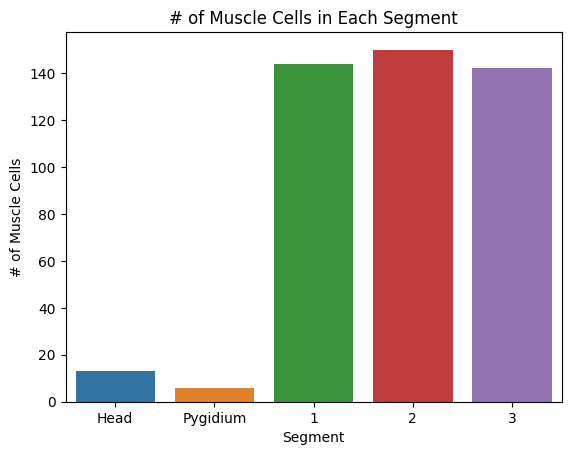

In [29]:
#print number of muscle cells in each segment

indices = []
segment_muscle = {}
for i in range(len(class_list)):
    if(class_list[i] == "muscle"):
        indices.append(i)

for i in indices:
    if segment_list[i] == "N/A":
        continue
    
    if segment_list[i] not in segment_muscle:
        segment_muscle[segment_list[i]] = 1
    
    else:
        segment_muscle[segment_list[i]] += 1

segment_keys = ["Head", "Pygidium", "1", "2", "3"]

#change keys
for key in segment_keys:
    segment_muscle[key] = segment_muscle.pop(key.lower())

#no segment 0
segment_muscle.pop("0")

sns.barplot(x=list(segment_muscle.keys()), y=list(segment_muscle.values())) 
plt.title("# of Muscle Cells in Each Segment")
plt.xlabel("Segment")
plt.ylabel("# of Muscle Cells")
plt.savefig(new_folder / "neuron_count_muscle_in_segments")

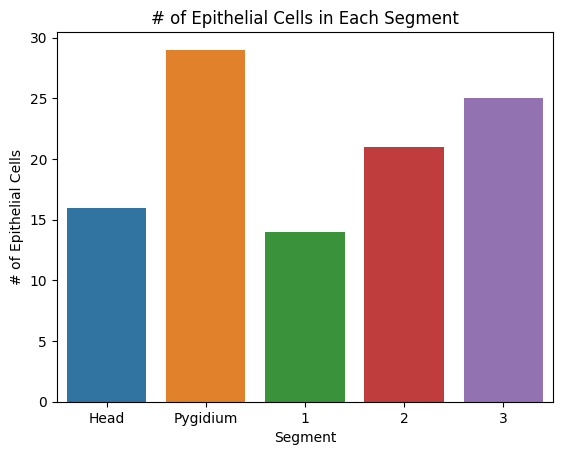

In [30]:
#print number of epithelial cells in each segment

indices = []
segment_epithelia = {}
for i in range(len(class_list)):
    if(class_list[i] == "epithelia"):
        indices.append(i)

for i in indices:
    if segment_list[i] == "N/A":
        continue
    
    if segment_list[i] not in segment_epithelia:
        segment_epithelia[segment_list[i]] = 1
    
    else:
        segment_epithelia[segment_list[i]] += 1

segment_keys = ["Head", "Pygidium", "1", "2", "3"]

#change keys
for key in segment_keys:
    segment_epithelia[key] = segment_epithelia.pop(key.lower())

#no segment 0
segment_epithelia.pop("0")

sns.barplot(x=list(segment_epithelia.keys()), y=list(segment_epithelia.values())) 
plt.title("# of Epithelial Cells in Each Segment")
plt.xlabel("Segment")
plt.ylabel("# of Epithelial Cells")
plt.savefig(new_folder / "neuron_count_epithelial_in_segments")

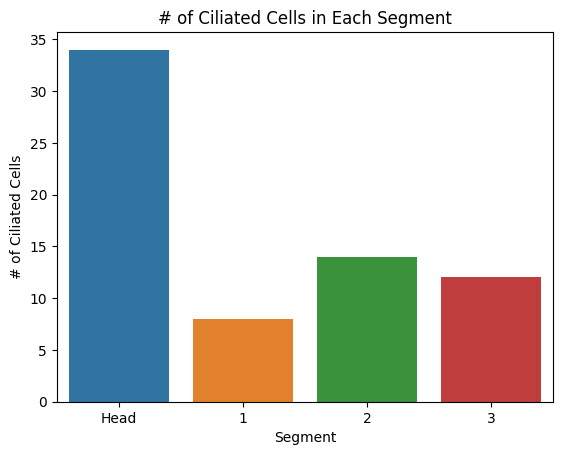

In [31]:
#print number of ciliated cells in each segment

indices = []
segment_ciliated = {}
for i in range(len(class_list)):
    if(class_list[i] == "ciliated"):
        indices.append(i)

for i in indices:
    if segment_list[i] == "N/A":
        continue
    
    if segment_list[i] not in segment_ciliated:
        segment_ciliated[segment_list[i]] = 1
    
    else:
        segment_ciliated[segment_list[i]] += 1

#no pygidium cells
segment_keys = ["Head", "1", "2", "3"]

#change keys
for key in segment_keys:
    segment_ciliated[key] = segment_ciliated.pop(key.lower())

#no segment 0
segment_ciliated.pop("0")

sns.barplot(x=list(segment_ciliated.keys()), y=list(segment_ciliated.values())) 
plt.title("# of Ciliated Cells in Each Segment")
plt.xlabel("Segment")
plt.ylabel("# of Ciliated Cells")
plt.savefig(new_folder / "neuron_count_ciliated_in_segments")

In [9]:
#number of neurons in each celltype (specified by paper)
annotations.fillna("N/A")
celltype_count = {}
celltype_list = list(annotations["type"])
for i in range(len(celltype_list)):
    if celltype_list[i] == "N/A":
        continue
    
    if celltype_list[i] not in celltype_count:
        celltype_count[celltype_list[i]] = 1
    
    else:
        celltype_count[celltype_list[i]] += 1
celltype_count = {int(k):v for k,v in celltype_count.items()}
celltype_count = dict(sorted(celltype_count.items()))
df = pd.DataFrame.from_dict(celltype_count, orient="index", columns=["count"])
df = df.rename_axis('celltype', axis=1)
df.to_csv(new_folder / "neuron_count_neuronal_types.csv")
df

celltype,count
1,24
2,11
3,4
4,2
5,4
...,...
176,2
177,2
178,4
179,1


In [10]:
#number of neurons in each cellgroup (specified by paper)
cellgroup_count = {}
cellgroup_list = list(annotations["group"])
for i in range(len(cellgroup_list)):
    if cellgroup_list[i] == "N/A":
        continue
    if cellgroup_list[i] not in cellgroup_count:
        cellgroup_count[cellgroup_list[i]] = 1
    
    else:
        cellgroup_count[cellgroup_list[i]] += 1
cellgroup_count = {int(k):v for k,v in cellgroup_count.items()}
cellgroup_count = dict(sorted(cellgroup_count.items()))
df = pd.DataFrame.from_dict(cellgroup_count, orient="index", columns=["count"])
df = df.rename_axis('cellgroup', axis=1)
df.to_csv(new_folder / "neuron_count_groups.csv")
df

cellgroup,count
1,95
2,45
3,107
4,35
5,25
6,25
7,108
8,16
9,44
10,8


In [11]:
# #number of cells in each non-neuronal celltype (TODO: make this a category in annotations?)
# celltypes_non_neuronal = []
# num_neurons = []
# celltypes_non_neuronal_count = {}
# for i, digit in enumerate(range(1, 91)):
#    celltypes_non_neuronal.append("celltype_non_neuronal{}".format(str(digit)))
#    num_neurons.append(len(pymaid.get_skids_by_annotation(celltypes_non_neuronal[i])))
#    celltypes_non_neuronal_count[celltypes_non_neuronal[i]] = [num_neurons[i]]

# df = pd.DataFrame.from_dict(celltypes_non_neuronal_count, orient="index", columns=["count"])
# df.to_csv(folder / "neuron_count_non_neuronal_types")
# print(df)